**Set environment**

In [11]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


## Import data

In [12]:
fdiry = file.path(FD_RES, "results", "region", "annotation_ccres")
fname = "description.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)
vec = dat$Name

vec_txt_cnames1 = vec
IRdisplay::display(dat)

Name,Description
<chr>,<chr>
Chrom,Chromosome
Start,Start position
End,End position
Name,Name
Score,Score
Strand,[+-.]; Use '.' if no strand is assigned.
ThickStart,The starting position at which the feature is drawn thickly
ThickEnd,The ending position at which the feature is drawn thickly
ItemRgb,"An RGB value of the form R,G,B (e.g. 255,0,0)"


In [13]:
ASSAY   = "LentiMPRA_K562_Nadav"
FOLDER  = "coverage"

fdiry = file.path(FD_RES, "results", ASSAY, FOLDER)
fname = "description.vikram230621.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)
vec = dat$Name

vec_txt_cnames2 = vec
IRdisplay::display(dat)

Name,Description
<chr>,<chr>
Chrom,Chromosome
Start,Start position
End,End position
Name,Site name
Score,Score (NULL)
Strand,Strand
Category,Site property (potential enhancer/promoter or postive/negative controls)
Log2FC_Rep1,Log2FoldChange of replicate 1
Log2FC_Rep2,Log2FoldChange of replicate 2


In [21]:
ASSAY   = "LentiMPRA_K562_Nadav"
FOLDER  = "coverage_ccres_v4"

fdiry = file.path(FD_RES, "results", ASSAY, FOLDER)
fname = "K562.vikram230621.LMPRA.stranded.bed.gz"
fpath = file.path(fdiry, fname)

vec1 = vec_txt_cnames1
vec1 = paste0(vec1, "_A")

vec2 = vec_txt_cnames2
vec2 = paste0(vec2, "_B")

vec_txt_cnames = c(vec1, vec2, "Overlap")

dat = read_tsv(fpath, col_names = vec_txt_cnames, show_col_types = FALSE)

dat_peak_score_import = dat
print(dim(dat))
head(dat)

[1] 221890     27


Chrom_A,Start_A,End_A,Name_A,Score_A,Strand_A,ThickStart_A,ThickEnd_A,ItemRgb_A,Category_A,⋯,Category_B,Log2FC_Rep1_B,Log2FC_Rep2_B,Log2FC_Rep3_B,Log2FC_Mean_B,ZScore_Rep1_B,ZScore_Rep2_B,ZScore_Rep3_B,ZScore_Mean_B,Overlap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,115562,115912,EH38E3951280,0,.,115562,115912,"0,176,240",CA-CTCF,⋯,potential enhancer,0.138,-0.044,0.025,0.040,2.4069026,1.7461277,1.9966413,2.05110076,200
chr1,138917,139112,EH38E3951286,0,.,138917,139112,"255,167,0",pELS,⋯,potential enhancer,-0.370,0.330,-0.261,-0.101,0.5625420,3.1039838,0.9582808,1.53918178,172
chr1,138917,139112,EH38E3951286,0,.,138917,139112,"255,167,0",pELS,⋯,potential enhancer,-0.245,-0.609,-0.775,-0.543,1.0163709,-0.3051788,-0.9078635,-0.06555714,172
chr1,267925,268171,EH38E2776528,0,.,267925,268171,"0,176,240",CA-CTCF,⋯,potential enhancer,-0.438,-1.087,-1.375,-0.967,0.3156591,-2.0406204,-3.0862422,-1.60494471,186
chr1,267925,268171,EH38E2776528,0,.,267925,268171,"0,176,240",CA-CTCF,⋯,potential enhancer,0.220,0.302,0.152,0.225,2.7046143,3.0023261,2.4577314,2.72276750,186
chr1,586036,586264,EH38E2776532,0,.,586036,586264,"0,176,240",CA-CTCF,⋯,potential enhancer,-0.245,-0.879,-0.199,-0.441,1.0163709,-1.2854492,1.1833799,0.30476722,171


In [40]:
fpath = "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/CRISPRi_Growth_K562_Gersbach/coverage_ccres_v4/CRISPRi_rAVG_log2FC_2.bed.gz"
dat = read_tsv(fpath, col_names = FALSE)
head(dat)

Rows: 0 Columns: 0

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


<0 x 0 matrix>

## Arrange

In [24]:
dat = dat_peak_score_import
dat = dat %>% 
    dplyr::mutate(
        Chrom  = Chrom_A,
        Start  = Start_A,
        End    = End_A,
        Region = paste0(Chrom_A, ":", Start_A, "-", End_A),
        Index  = Name_A,
        Label  = Category_A,
        Score  = ZScore_Mean_B
    ) %>%
    dplyr::select(
        Chrom, Start, End, Region, Index, Label, Score
    )

###
dat_peak_score_arrange = dat
print(dim(dat))
head(dat)

[1] 221890      7


Chrom,Start,End,Region,Index,Label,Score
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
chr1,115562,115912,chr1:115562-115912,EH38E3951280,CA-CTCF,2.05110076
chr1,138917,139112,chr1:138917-139112,EH38E3951286,pELS,1.53918178
chr1,138917,139112,chr1:138917-139112,EH38E3951286,pELS,-0.06555714
chr1,267925,268171,chr1:267925-268171,EH38E2776528,CA-CTCF,-1.60494471
chr1,267925,268171,chr1:267925-268171,EH38E2776528,CA-CTCF,2.72276750
chr1,586036,586264,chr1:586036-586264,EH38E2776532,CA-CTCF,0.30476722


## Summary

In [28]:
###
dat = dat_peak_score_arrange
dat = dat %>% dplyr::mutate(Sign  = ifelse(Score > 0, "pos", "neg"))
table(dat$Sign)


   neg    pos 
 49959 171931 

In [26]:
dat = dat_peak_score_arrange

In [30]:
###
dat = dat_peak_score_arrange
dat = dat %>% dplyr::mutate(Sign  = ifelse(Score > 0, "pos", "neg"))

###
dat_summary_total = dat %>%
    dplyr::group_by(Region) %>%
    dplyr::summarise(
        Mean    = mean(Score),
        Median  = median(Score),
        Max     = max(Score),
        Min     = min(Score),
        Count   = n(),
        .groups = "drop"
    )

###
dat_summary_sign = dat %>%
    dplyr::group_by(Region, Sign) %>%
    dplyr::summarise(Mean = mean(Score), .groups = "drop") %>% 
    dplyr::mutate(Sign = dplyr::recode(Sign, `pos` = "Mean_Pos", `neg` = "Mean_Neg")) %>% 
    tidyr::spread(Sign, Mean)

###
dat = dplyr::left_join(
    dat_summary_total,
    dat_summary_sign,
    by = c("Region")) %>% 
    replace(is.na(.), 0)

dat_peak_score_summary = dat
print(dim(dat))
head(dat)

[1] 106924      8


Region,Mean,Median,Max,Min,Count,Mean_Neg,Mean_Pos
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
chr10:100006302-100006644,0.80034836,0.80034836,1.0163709,0.5843258,2,0.0000000,0.8003484
chr10:100046073-100046363,1.35946554,1.35946554,1.4810917,1.2378394,2,0.0000000,1.3594655
chr10:100065250-100065591,1.07264569,1.07264569,1.3503890,0.7949024,2,0.0000000,1.0726457
chr10:100081412-100081749,0.08511404,0.08511404,0.7150285,-0.5448004,2,-0.5448004,0.7150285
chr10:100100656-100100903,1.03089343,1.03089343,1.1507043,0.9110826,2,0.0000000,1.0308934
chr10:100129367-100129715,0.21944739,0.21944739,0.2611997,0.1776951,2,0.0000000,0.2194474


In [31]:
dat = dat_peak_score_summary
summary(dat$Count)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   2.000   2.075   2.000   6.000 

In [32]:
dat = dat_peak_score_summary
table(dat$Count)


    1     2     3     4     5     6 
 3038 98324   364  5024    28   146 

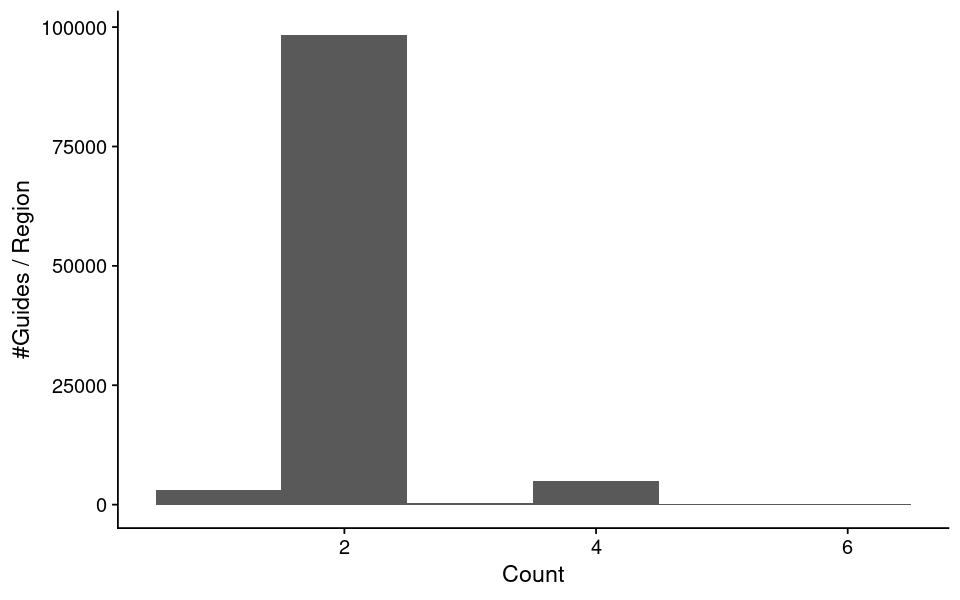

In [33]:
dat = dat_peak_score_summary
gpt = ggplot(dat, aes(x=Count)) + 
    geom_histogram(binwidth = 1) + 
    labs(y="#Guides / Region") +
    theme_cowplot()
options(repr.plot.height=5, repr.plot.width=8)
print(gpt)

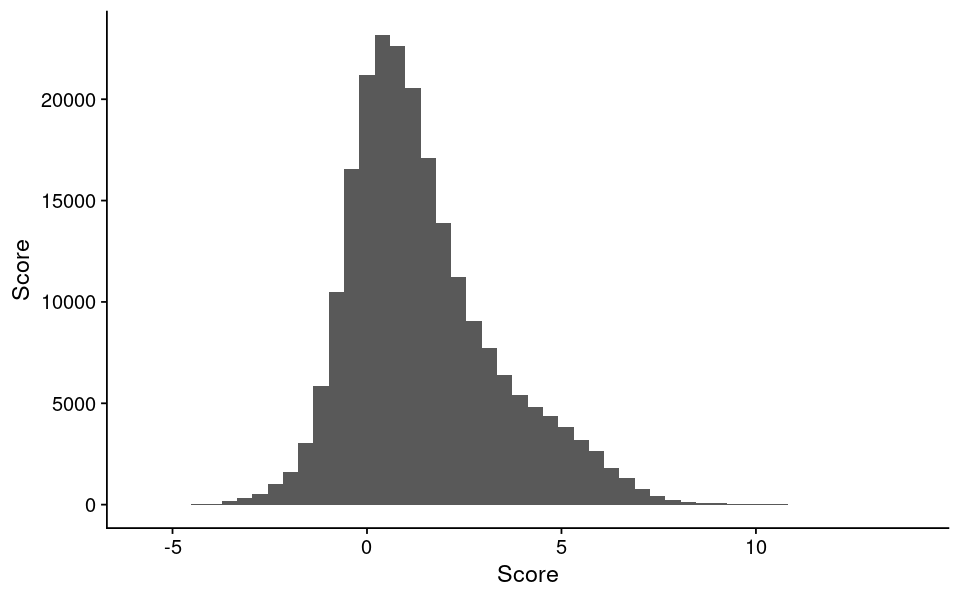

In [34]:
dat = dat_peak_score_arrange
gpt = ggplot(dat, aes(x=Score)) + 
    geom_histogram(bins = 50) + 
    labs(y="Score") +
    theme_cowplot()
print(gpt)

## Save results

In [36]:
ASSAY

[1] "LentiMPRA_K562_Nadav"

In [37]:
FOLDER

[1] "coverage_ccres_v4"

In [38]:
fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
fname = "results.score.vikram230621.tsv"
fpath = file.path(fdiry, fname)

dat = dat_peak_score_arrange
write_tsv(dat, fpath)

In [39]:
fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
fname = "results.summary.vikram230621.tsv"
fpath = file.path(fdiry, fname)

dat = dat_peak_score_summary
write_tsv(dat, fpath)